In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('loan.csv', low_memory=False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

- Data cleaning to filter data, remove/impute nulls, data type conversions and remove unwanted characters from data.

### Null Value Treatment

In [6]:
#Adding nulls percentage to a pandas series object so that it can be used easily for filtering purpose 
null_data=(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_data.head()

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
dtype: float64

In [7]:
#List columns which are having more than 75% NULL values
cols_75_null = null_data[null_data>=75].index
cols_75_null

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [8]:
#List columns which are having 50% to 75% NULL values
cols_50_null = null_data[(null_data>=50) & (null_data<75)].index
cols_50_null

Index(['mths_since_last_delinq'], dtype='object')

In [9]:
#Remove all columns which are having >50% NULL data and create a new dataframe as df_final
final_features = [col for col in df.columns if col not in cols_75_null.append(cols_50_null)]
df_final = df[final_features].copy()

In [10]:
df_final.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
df_final.shape

(39717, 54)

In [12]:
#Check for NULLs again
(df_final.isnull().sum()).sort_values(ascending=False)

desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_rec_prncp                   0
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
collection_recovery_fee           0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
pub_rec                           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                 

- Except for "desc" column, rest all columns have very less NULL value count
- It makes sense to remove the rows which are having NULLs
- For "desc", lets analyze the data

In [13]:
df_final.desc.head(5)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

Looks like a text data having some information about the loan.
- Let's see if anything can be useful

In [14]:
#looking at one record
df_final.desc.iloc[0]

'  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'

In [15]:
df_final.desc.iloc[3]

"  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"

The information is not standard. Better to drop the column.

In [16]:
#drop column "desc"
df_final.drop(columns=['desc'], inplace=True)

In [17]:
#As mentioned above, drop rows having any NULL values
df_final.dropna(inplace=True)

In [18]:
#verifying if NULLs are present
df_final.isnull().any().any()

False

In [19]:
df_final.shape

(36431, 53)

In [20]:
#Total rows dropped 
print("Total rows dropped: {} ({}%)".format(df.shape[0]-df_final.shape[0], 
                                            round((df.shape[0]-df_final.shape[0])/df.shape[0]*100),2))

Total rows dropped: 3286 (8%)


### Formatting and cleaning

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

From above list of columns, it looks like below mentioned columns should be having float/int datatype rather than object datatype
- term
- int_rate
- emp_length
- revol_util

In [22]:
#Checking values from term
df_final.term.value_counts()

 36 months    26375
 60 months    10056
Name: term, dtype: int64

There are only 2 values and seems to be better kept as "object" (categorical).

In [23]:
#Chekcing for interest rate
df_final.int_rate.value_counts(dropna=False)

10.99%    901
13.49%    785
11.49%    768
7.51%     731
7.88%     674
7.49%     616
11.71%    573
9.99%     567
7.90%     537
5.42%     505
11.99%    502
12.69%    468
10.37%    433
8.49%     417
12.42%    417
12.99%    408
10.65%    404
6.03%     399
5.79%     380
14.27%    366
11.86%    364
8.90%     364
7.29%     363
9.63%     360
6.62%     358
10.59%    336
9.91%     336
7.14%     315
5.99%     313
11.11%    312
6.99%     311
16.77%    308
12.53%    307
6.54%     295
10.74%    294
13.61%    284
6.91%     282
13.98%    269
8.94%     269
15.99%    267
7.66%     263
13.23%    252
13.99%    244
11.12%    237
10.00%    236
12.68%    235
11.36%    235
10.36%    235
10.75%    233
6.17%     231
16.49%    227
18.25%    214
10.62%    210
10.38%    209
13.06%    207
14.65%    205
10.25%    203
11.83%    202
15.23%    199
16.89%    198
14.96%    197
15.65%    195
15.95%    194
12.18%    189
15.27%    187
17.27%    187
6.92%     186
11.14%    184
16.32%    183
17.49%    179
9.32%     178
15.21%

The values have "%" sign at the end which is why the colums is not getting read as a "float"

In [24]:
#Removing % sign
df_final['int_rate']  = df_final['int_rate'].apply(lambda x: float(x[:-1]))

In [25]:
df_final.int_rate.value_counts().head()

10.99    901
13.49    785
11.49    768
7.51     731
7.88     674
Name: int_rate, dtype: int64

In [26]:
#Checking for employee length
df_final.emp_length.value_counts()

10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

"Year/s" added to the end and "<" and "+" symbols are making this field as "object".
Transforming as per the data dictionary instructions:
- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [27]:
#convert "<1 year" to "0 years"
df_final['emp_length'] = df_final['emp_length'].apply(lambda x: '0 years' if x=='< 1 year' else x)

In [28]:
df_final.emp_length.value_counts(dropna=False)

10+ years    8407
2 years      4176
0 years      4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [29]:
#Step 1: Split the value on space (" ") and take first element. This will give values as 1,2,3...10+.
#Step 2: Replace "+" sign with blank to convert 10+ to 10
df_final['emp_length'] = df_final['emp_length'].apply(lambda x: int(x.split(" ")[0].replace("+","")))

In [30]:
df_final.emp_length.value_counts(dropna=False)

10    8407
2     4176
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [31]:
#Checking data for revol_util
df_final.revol_util.value_counts(dropna=False)

0%        852
0.20%      58
66.60%     55
64.80%     55
61%        55
70.40%     55
63%        54
32%        53
78.70%     53
40.70%     53
37.60%     53
46.40%     53
66.70%     52
27.20%     52
68.70%     52
51.60%     52
0.10%      52
57.40%     52
70.10%     51
70.80%     51
46.60%     51
65.90%     51
62.80%     51
66.10%     51
31.20%     51
41%        51
25.50%     50
48.20%     50
51.50%     50
60.20%     50
75.50%     50
54.60%     50
68.60%     50
54.30%     50
89.50%     50
29.10%     50
64.60%     50
48.90%     50
43.40%     49
66.90%     49
35.70%     49
76.60%     49
23.70%     49
89.90%     49
36.50%     49
62.30%     49
55.80%     49
74.90%     49
40.20%     48
53.90%     48
72.10%     48
48%        48
58.70%     48
35.30%     48
55.50%     48
54%        48
49.80%     48
52.40%     48
73.20%     48
47.80%     48
45.60%     48
45.90%     48
70%        47
57.80%     47
30.90%     47
55.20%     47
79.70%     47
44.70%     47
57.90%     47
52.30%     47
41.40%     47
64.30%

Similar to interest rate, the values have "%" sign at the end which is why the colums is not getting read as a "float"

In [32]:
#Removing % sign from the end
df_final['revol_util']  = df_final['revol_util'].apply(lambda x: float(x[:-1]))

In [33]:
df_final.revol_util.value_counts().head()

0.0     852
0.2      58
66.6     55
64.8     55
61.0     55
Name: revol_util, dtype: int64

### Removing unwanted columns - Business understanding and result understanding

In [34]:
df_final.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Based on the columns data and information from Data Dictionary along with the output/result expected, below list of columns seems to be not required for the further analysis:
1. emp_title - too many values 
2. url - no information extracted
3. title - no relavent information extracted
4. zip_code - masked field

In [35]:
df_final.drop(columns=['emp_title','url','title','zip_code'], inplace=True)

Below list of columns are Post-loan approval. Removing them since our goal is to identify the defaulters before the loan approval.
1. mths_since_last_delinq
2. mths_since_last_major_derog
3. mths_since_last_record
4. next_pymnt_d
5. last_pymnt_amnt
6. last_pymnt_d
7. last_credit_pull_d
8. total_pymnt
9. total_pymnt_inv
10. total_rec_int
11. total_rec_late_fee
12. total_rec_prncp
13. total_rev_hi_lim  

NOTE: Some of them are already removed during the NULL value treatment

In [36]:
df_final.drop(columns=['last_pymnt_amnt','last_pymnt_d','last_credit_pull_d','total_pymnt','total_pymnt_inv',
                       'total_rec_int','total_rec_late_fee','total_rec_prncp'], inplace=True)

Removing 'id' and 'member_id' fields as these are just unique identifiers. Not requried for data analysis.

In [37]:
df_final.drop(columns=['id','member_id'], inplace=True)

### Date conversions
- issue_d
- earliest_cr_line

In [38]:
df_final.issue_d.head()

1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
Name: issue_d, dtype: object

All the dates are in "MMM-YY" format. 
Will convert this into 2 columns
1. Month
2. Year

Note: Converting the columsn to "object" as these are ordinal categorical features and not numeric.

In [39]:
df_final['issue_month'] = pd.to_datetime(df_final.issue_d, format='%b-%y').dt.month.astype('object')
df_final['issue_year'] = pd.to_datetime(df_final.issue_d, format='%b-%y').dt.year.astype('object')

In [40]:
df_final['earliest_cr_line_month'] = pd.to_datetime(df_final.earliest_cr_line, format='%b-%y').dt.month.astype('object')
df_final['earliest_cr_line_year'] = pd.to_datetime(df_final.earliest_cr_line, format='%b-%y').dt.year.astype('object')

In [41]:
#Dropping the columns issue_d and earliest_cr_line
df_final.drop(columns=['issue_d','earliest_cr_line'], inplace=True)

As we are concerned only for defaulters and non-defaulters, we can remove accounts/loans whihc are currently in servicing i.e. loan_statu='current'

In [42]:
df_final = df_final[~(df_final['loan_status']=='Current')]

In [43]:
df_final.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Name: loan_status, dtype: int64

In [44]:
df_final.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,recoveries,collection_recovery_fee,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
count,35365.000000,35365.000000,35365.000000,35365,35365.000000,35365.000000,35365,35365,35365.000000,35365,3.536500e+04,35365,35365,35365,35365,35365,35365.000000,35365.000000,35365.000000,35365.000000,35365.000000,35365.000000,35365.000000,35365.000000,35365,35365.0,35365.0,35365.000000,35365.000000,35365.0,35365.0,35365,35365.0,35365.0,35365.0,35365.000000,35365.0,35365.0,35365.0,35365.0,35365.0
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,NaN,4,NaN,3,2,1,14,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,12.0,5.0,12.0,51.0
top,NaN,NaN,NaN,36 months,NaN,NaN,B,A4,NaN,RENT,NaN,Not Verified,Fully Paid,n,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,12.0,2011.0,10.0,2000.0
freq,NaN,NaN,NaN,26375,NaN,NaN,10718,2662,NaN,17065,NaN,14838,30423,35365,16909,6396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35365,NaN,NaN,NaN,NaN,NaN,NaN,35365,NaN,NaN,NaN,NaN,NaN,3820.0,19090.0,3663.0,2946.0
mean,11133.179697,10866.618832,10427.681981,NaN,11.983494,324.045146,NaN,NaN,4.983713,NaN,6.909774e+04,NaN,NaN,NaN,NaN,NaN,13.404126,0.146331,0.866902,9.332080,0.054093,13368.218465,49.138820,22.209473,NaN,0.0,0.0,95.651064,12.029618,0.0,1.0,NaN,0.0,0.0,0.0,0.041623,0.0,NaN,NaN,NaN,NaN
std,7326.276639,7069.620552,6968.144008,NaN,3.702615,207.149207,NaN,NaN,3.537056,NaN,6.396843e+04,NaN,NaN,NaN,NaN,NaN,6.636652,0.493073,1.064386,4.374926,0.235633,15678.724846,28.228489,11.402985,NaN,0.0,0.0,692.075086,142.976983,0.0,0.0,NaN,0.0,0.0,0.0,0.200436,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,NaN,5.420000,16.080000,NaN,NaN,0.000000,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,NaN,0.0,0.0,0.000000,0.000000,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5500.000000,5000.000000,NaN,8.940000,167.840000,NaN,NaN,2.000000,NaN,4.150000e+04,NaN,NaN,NaN,NaN,NaN,8.320000,0.000000,0.000000,6.000000,0.000000,3783.000000,25.900000,14.000000,NaN,0.0,0.0,0.000000,0.000000,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,9000.000000,NaN,11.830000,280.620000,NaN,NaN,4.000000,NaN,6.000000e+04,NaN,NaN,NaN,NaN,NaN,13.500000,0.000000,1.000000,9.000000,0.000000,8935.000000,49.700000,21.000000,NaN,0.0,0.0,0.000000,0.000000,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14300.000000,NaN,14.460000,426.560000,NaN,NaN,9.000000,NaN,8.250000e+04,NaN,NaN,NaN,NaN,NaN,18.640000,0.000000,1.000000,12.000000,0.000000,17065.000000,72.600000,29.000000,NaN,0.0,0.0,0.000000,0.000000,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN


From above statistcal distribution, it can be seen that some of the categorical columns have only 1 value throughout the data.
Also some of the numerical/continuous columns are having single value for min, 25th, 50th, 75th and max values.

Below list of columns doesnt have much diversity in the data
1. pymnt_plan - single value 'n' throughout the data
2. initial_list_status - single value 'f' throughout the data
3. application_type - single value 'INDIVIDUAL' throughout the data
4. collections_12_mths_ex_med - '0'throughout the data
5. policy_code - '1' throughout the data
6. acc_now_delinq - '0'throughout the data
7. chargeoff_within_12_mths - '0'throughout the data
8. delinq_amnt - '0'throughout the data
9. tax_liens - '0'throughout the data
10. out_prncp - '0'throughout the data
11. out_prncp_inv - '0'throughout the data
hence dropping them

In [45]:
df_final.drop(columns=['pymnt_plan','initial_list_status','application_type','collections_12_mths_ex_med','policy_code',
                      'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','out_prncp','out_prncp_inv'], 
              inplace=True)

Seggregating continuous and categorical features

In [46]:
continuous_features = list(df_final.dtypes[df_final.dtypes!='object'].index)
categorical_features = list(df_final.dtypes[df_final.dtypes=='object'].index)

Looking at few columns which look like are having extreme values i.e. not distributed properly using histograms.

<Figure size 500x200 with 0 Axes>

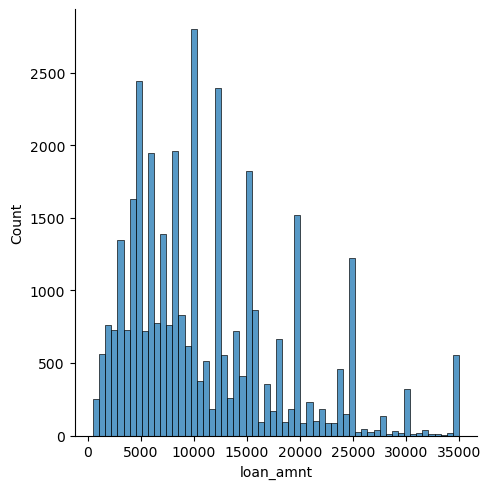

<Figure size 500x200 with 0 Axes>

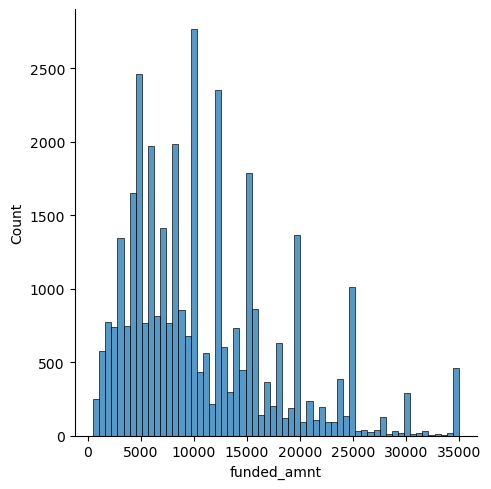

<Figure size 500x200 with 0 Axes>

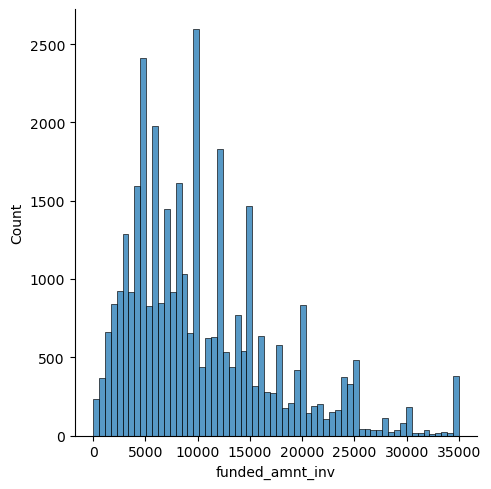

<Figure size 500x200 with 0 Axes>

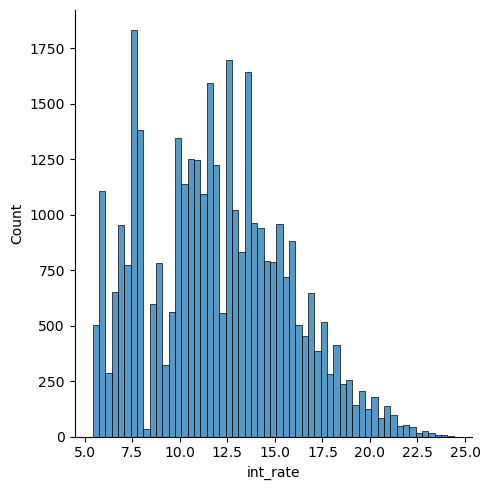

<Figure size 500x200 with 0 Axes>

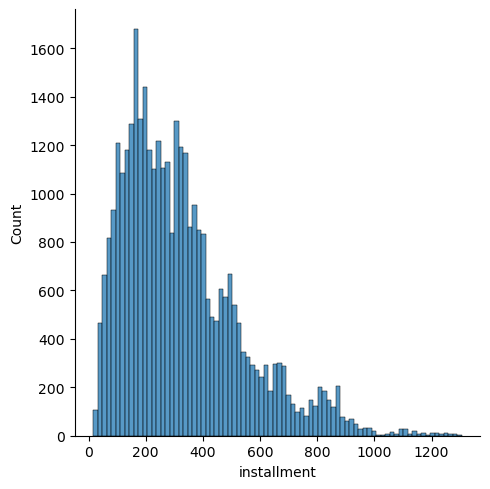

<Figure size 500x200 with 0 Axes>

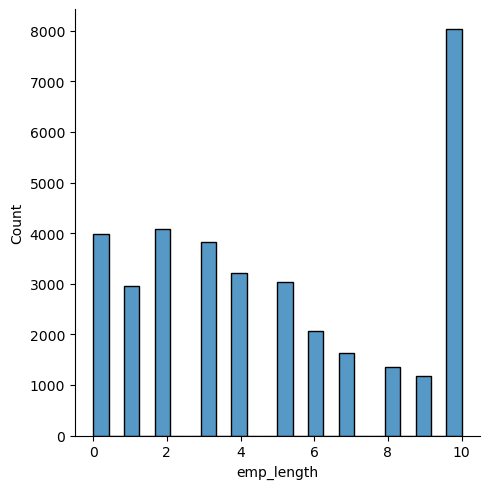

<Figure size 500x200 with 0 Axes>

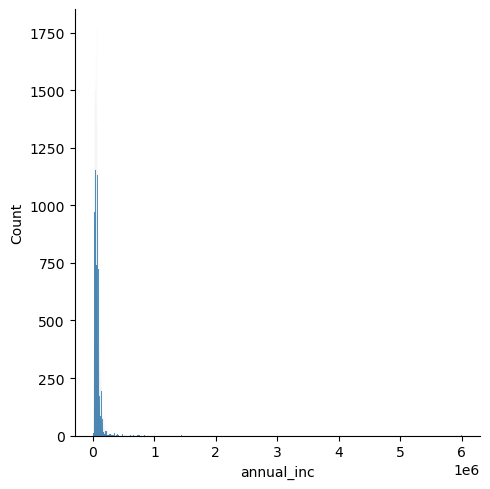

<Figure size 500x200 with 0 Axes>

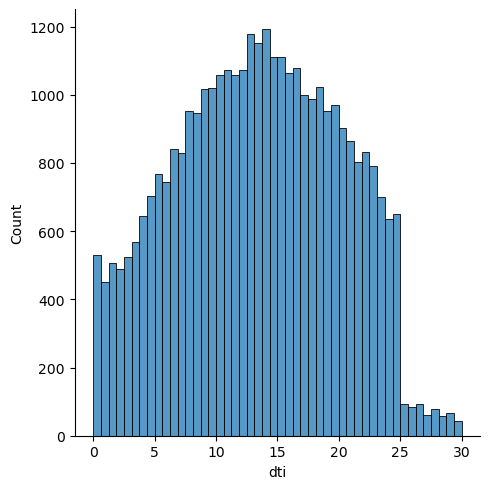

<Figure size 500x200 with 0 Axes>

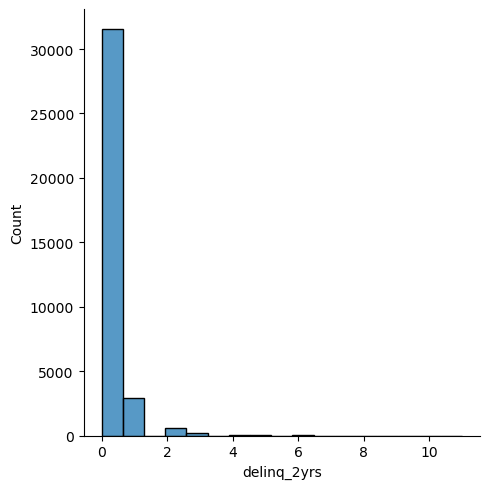

<Figure size 500x200 with 0 Axes>

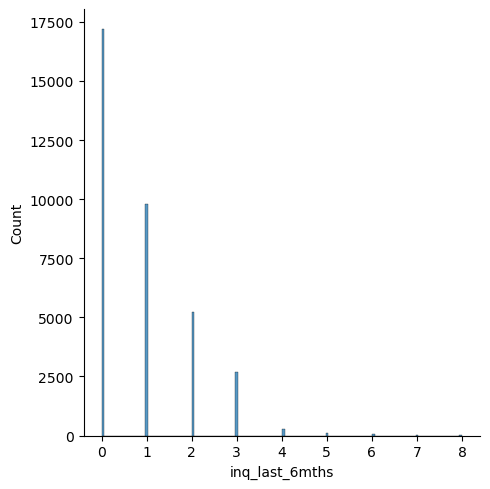

<Figure size 500x200 with 0 Axes>

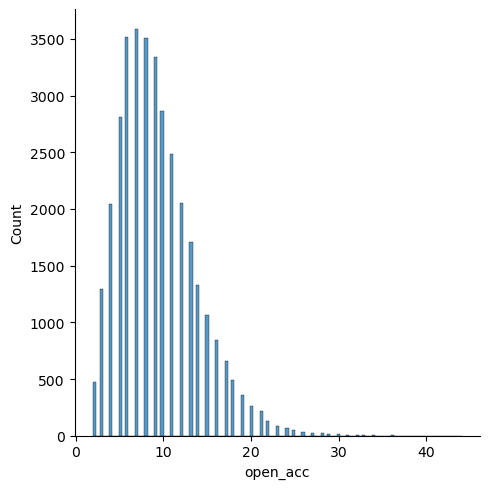

<Figure size 500x200 with 0 Axes>

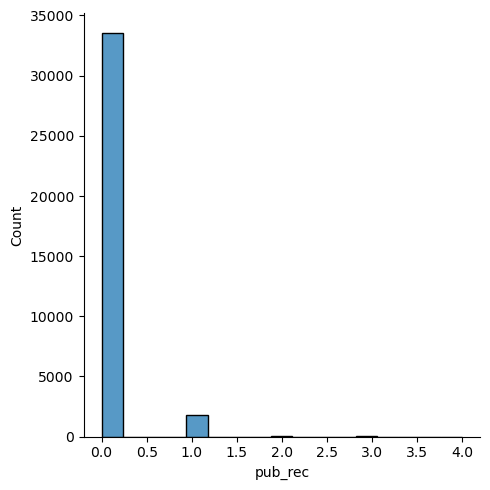

<Figure size 500x200 with 0 Axes>

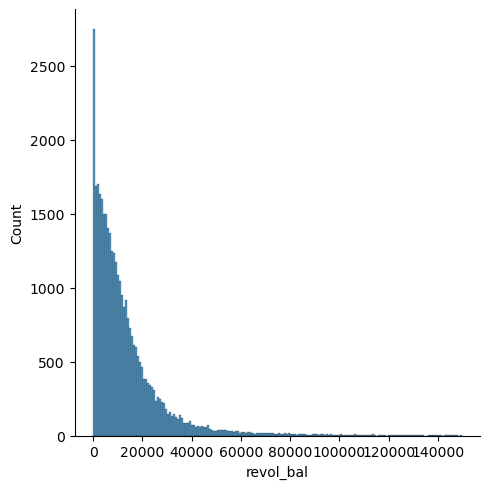

<Figure size 500x200 with 0 Axes>

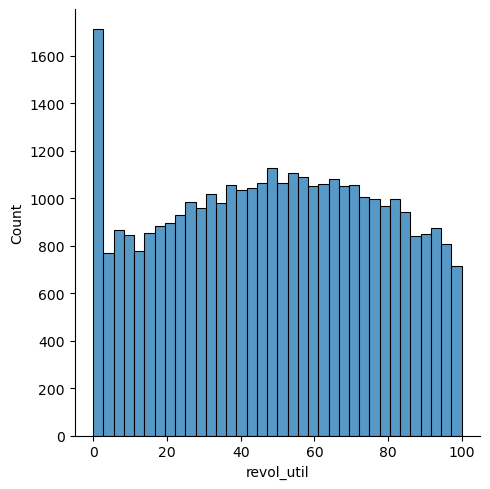

<Figure size 500x200 with 0 Axes>

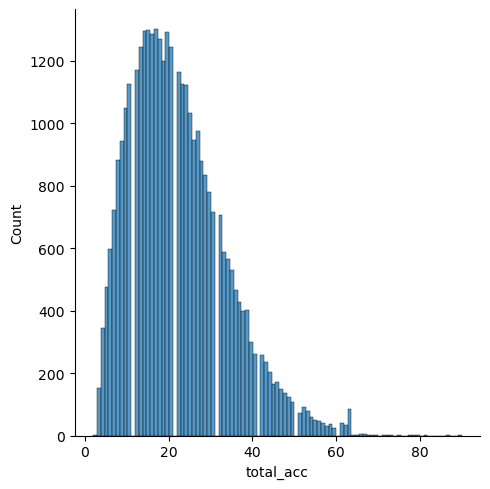

<Figure size 500x200 with 0 Axes>

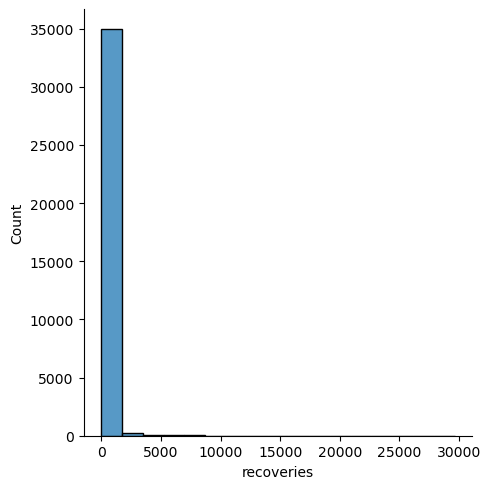

<Figure size 500x200 with 0 Axes>

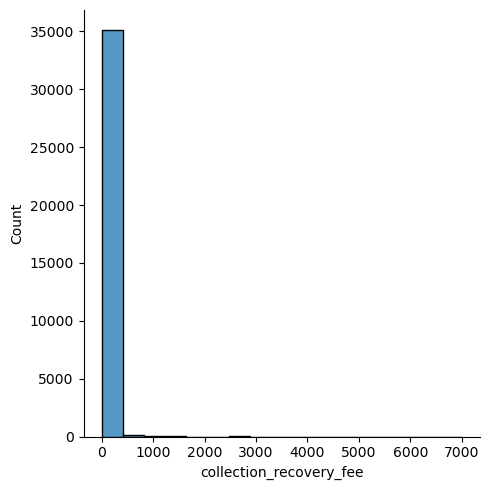

<Figure size 500x200 with 0 Axes>

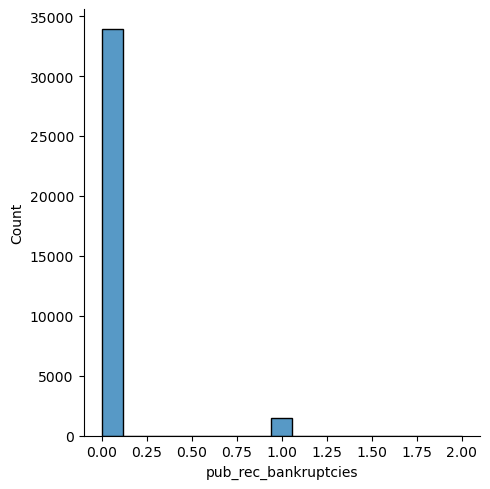

In [47]:
for col in continuous_features:
    plt.figure(figsize=(5,2))
    sns.displot(data=df_final, x=col)
    plt.show()

From above histograms, it looks liek few columns have heavily biased data i.e. having majority of data with single value.
- delinq_2yrs - majority of the data is 0
- pub_rec - Majority data is 0
- recoveries - Majority data is towards 0
- collection_recovery_fee 
- pub_rec_bankruptcies

Lets look at them individually with more bins

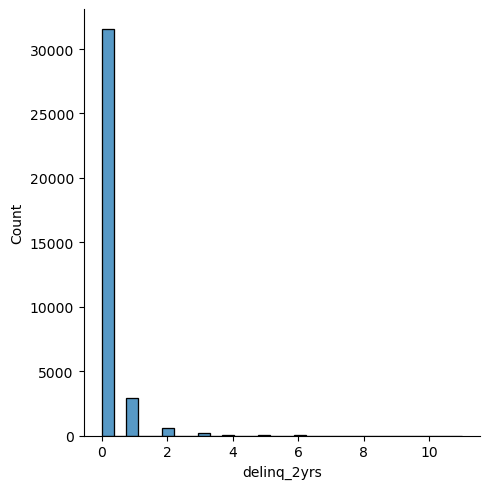

In [48]:
sns.displot(data=df_final,x='delinq_2yrs', bins=30)
plt.show()

We can remove this column as it will not provide any information since the data is skewed.

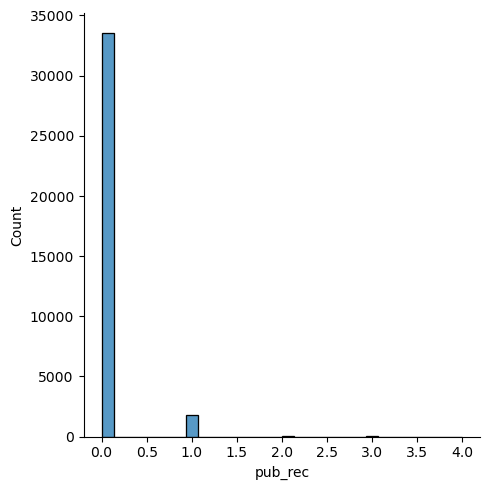

In [49]:
sns.displot(data=df_final,x='pub_rec', bins=30)
plt.show()

We can remove this column as it will not provide any information since the data is skewed.

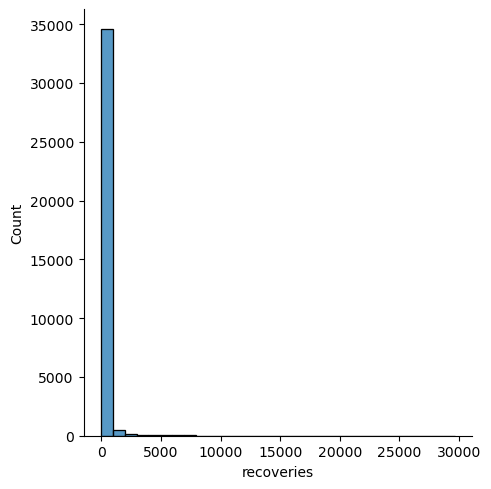

In [50]:
sns.displot(data=df_final,x='recoveries', bins=30)
plt.show()

We can remove this column as it will not provide any information since the data is skewed.

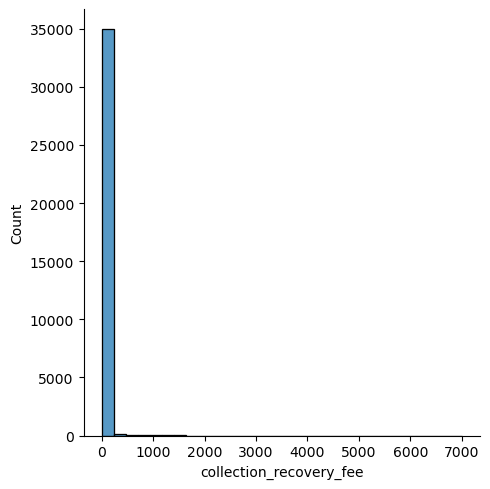

In [51]:
sns.displot(data=df_final,x='collection_recovery_fee', bins=30)
plt.show()

We can remove this column as it will not provide any information since the data is skewed.

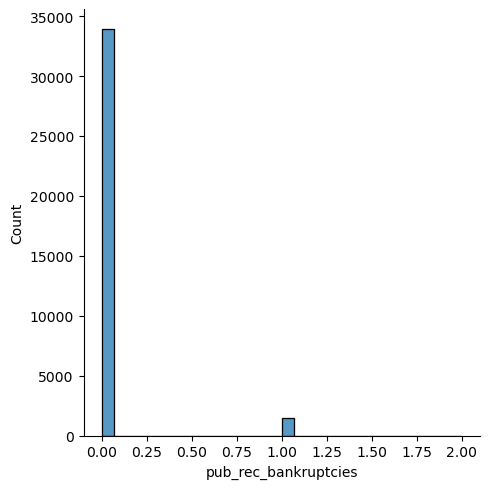

In [52]:
sns.displot(data=df_final,x='pub_rec_bankruptcies', bins=30)
plt.show()

We can remove this column as it will not provide any information since the data is skewed.

In [53]:
#Removing all these columns just analyzed
df_final.drop(columns=['delinq_2yrs','pub_rec','recoveries','collection_recovery_fee','pub_rec_bankruptcies'], inplace=True)

In [54]:
#updating numerical colums list
continuous_features = list(df_final.dtypes[df_final.dtypes!='object'].index)

#### Outlier checking and treatment
using boxplots analyzing the distribution and outiers

In [55]:
len(continuous_features)

13

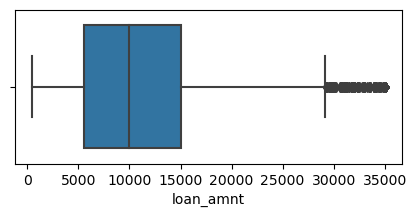

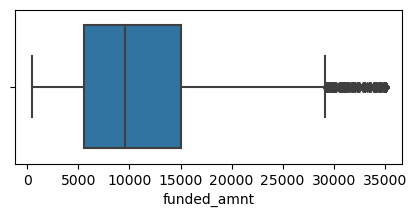

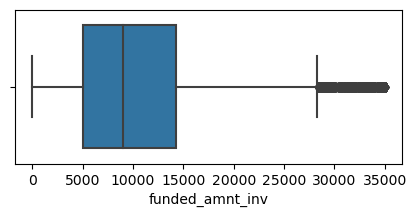

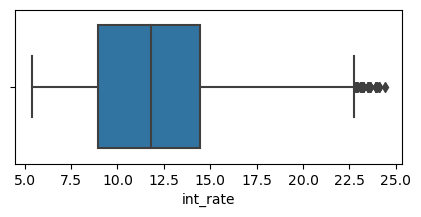

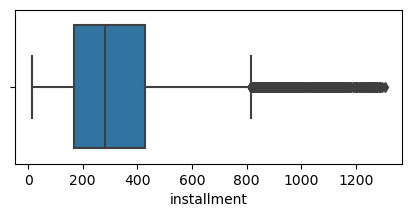

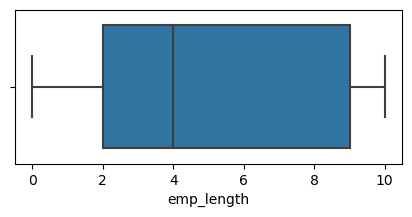

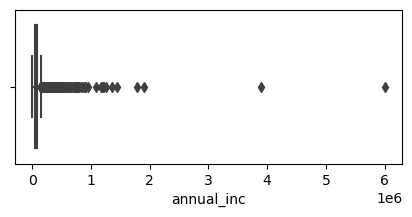

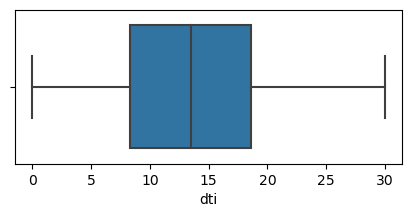

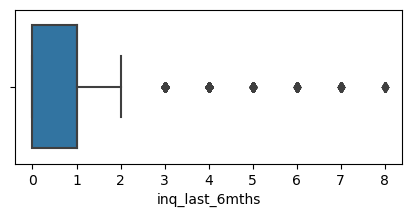

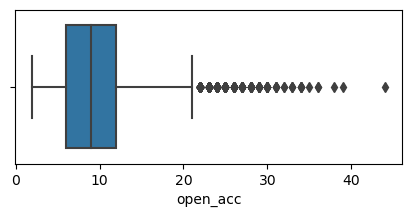

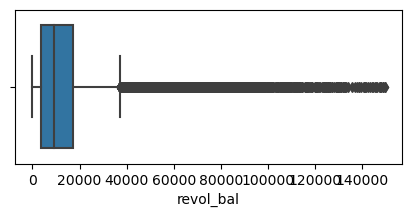

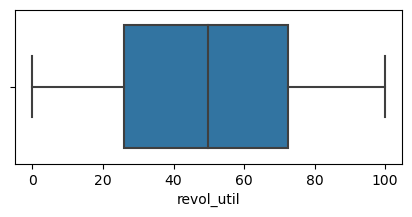

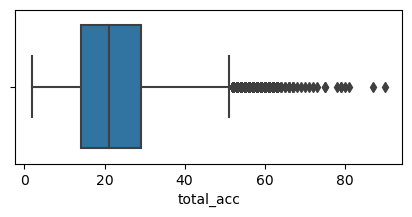

In [56]:
for col in continuous_features:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_final, x=col)
    plt.show()

Analysis:
- Annual income columns has high amoutn of outliers
- Removing confirmed outliers them using 3*IQR method
- Reason for removing using 3 and not 1.5 is, I feel that the extreme values are also important in Annual income since these values will signify higer earning customers

In [57]:
Q1,Q3 = df_final.annual_inc.quantile([0.25,0.75])
IQR = Q3-Q1
upper_whisker = Q3 + 3*IQR
lower_whisker = Q1 - 3*IQR

df_final['annual_inc'] = df_final.annual_inc.apply(lambda x: upper_whisker if x>upper_whisker else x)
df_final['annual_inc'] = df_final.annual_inc.apply(lambda x: lower_whisker if x<lower_whisker else x)

<AxesSubplot:xlabel='annual_inc'>

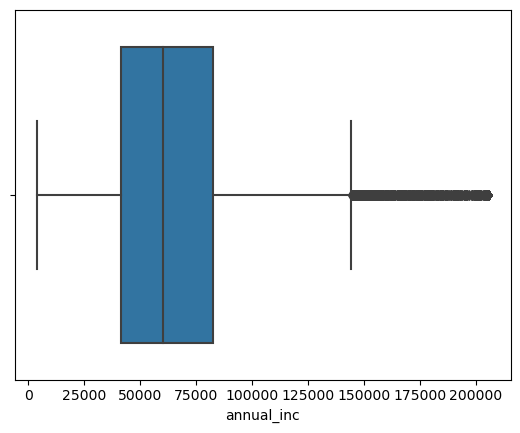

In [58]:
sns.boxplot(data=df_final, x='annual_inc')

Other colums does contain some outliers as seen from the boxplots, however these outliers will not impact our analysis since we are ony doing EDA and not building any model on the data.

## EDA

#### Univariate Analysis

##### Categorical columns

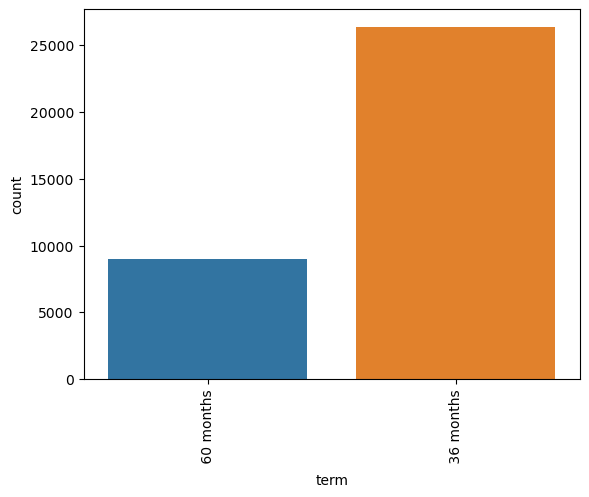

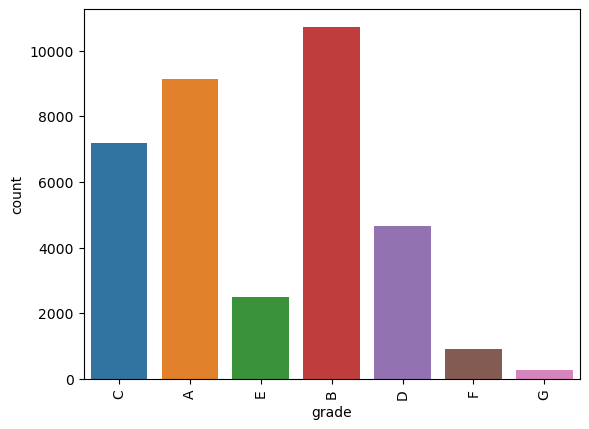

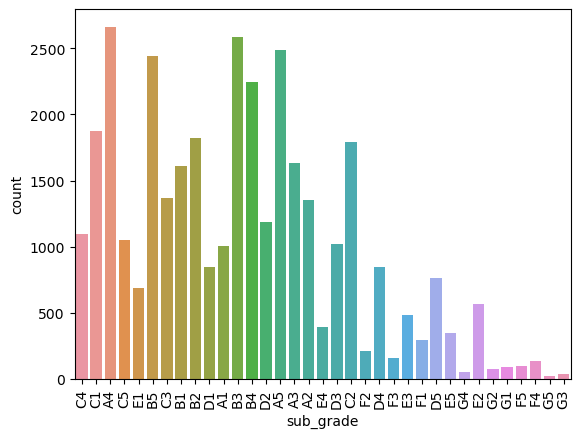

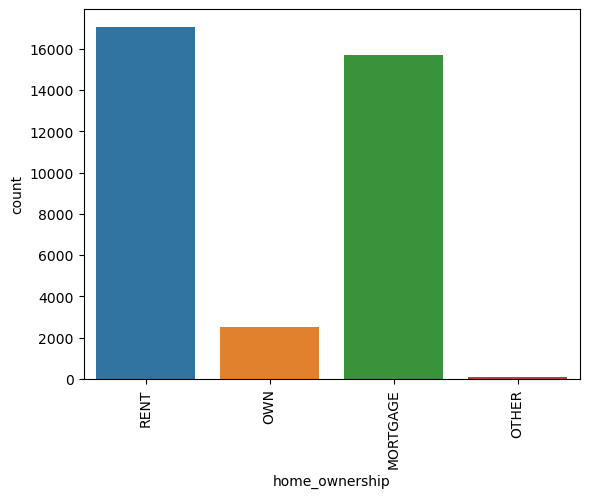

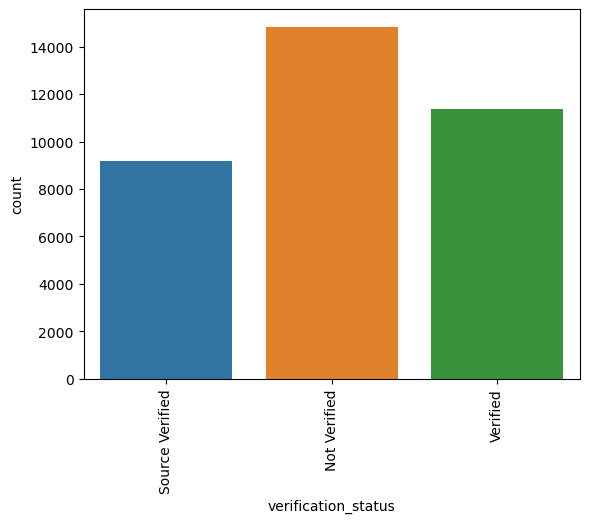

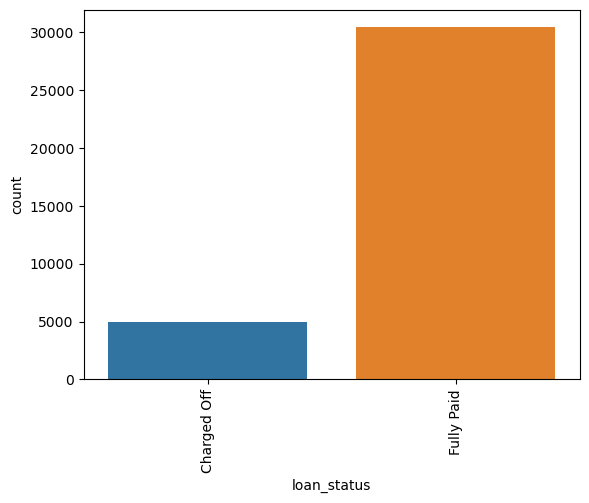

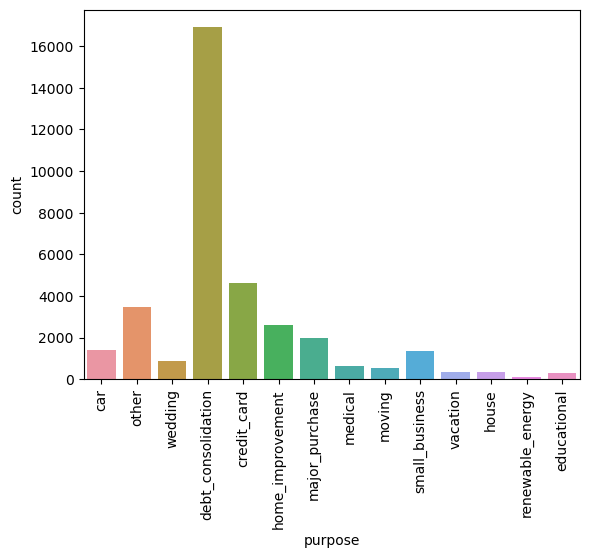

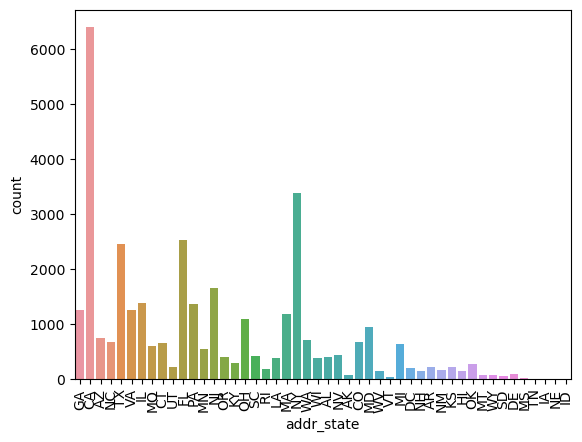

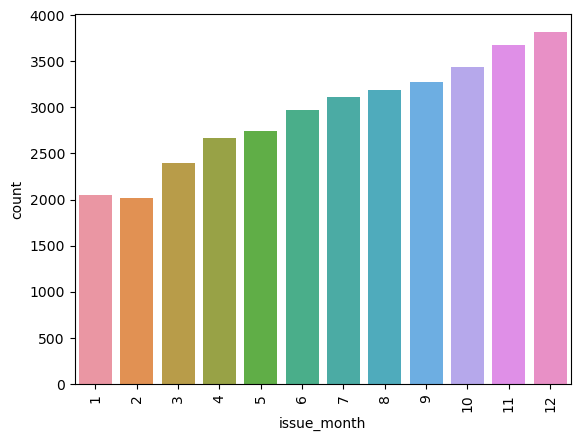

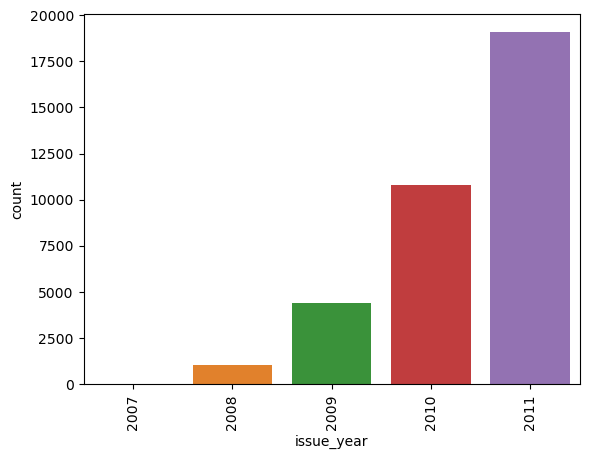

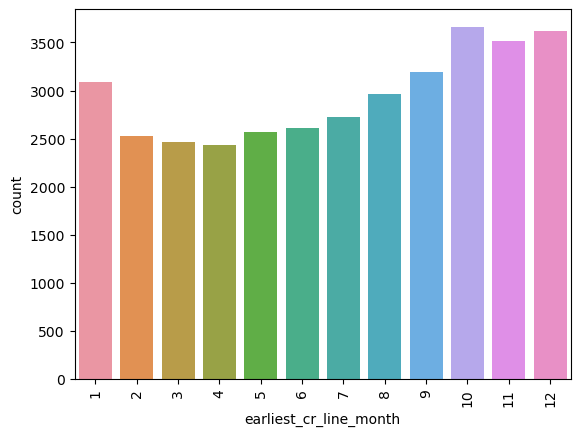

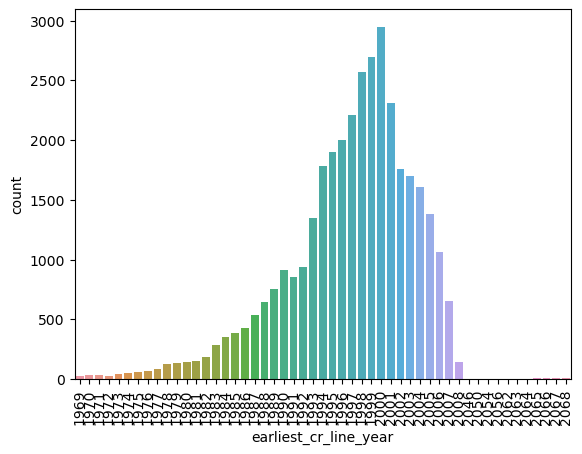

In [59]:
for col in categorical_features:
    sns.countplot(data=df_final, x=col)
    plt.xticks(rotation=90)
    plt.show()

All of the categorical data is well distributed.

## Bivariate Analysis with respect to Loan Status

<AxesSubplot:>

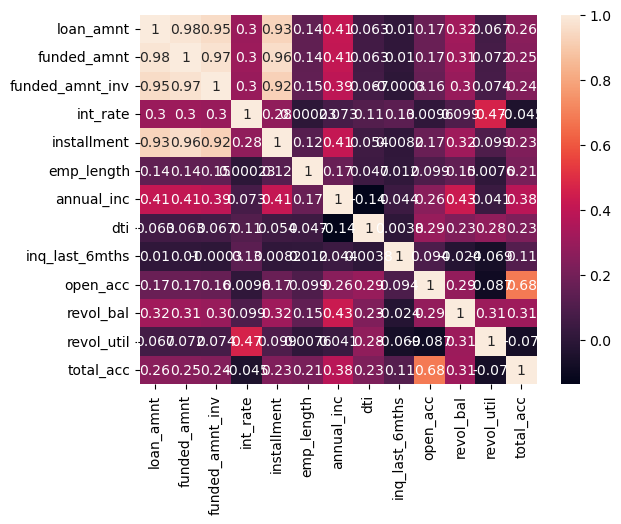

In [64]:
sns.heatmap(df_final.corr(), annot=True)

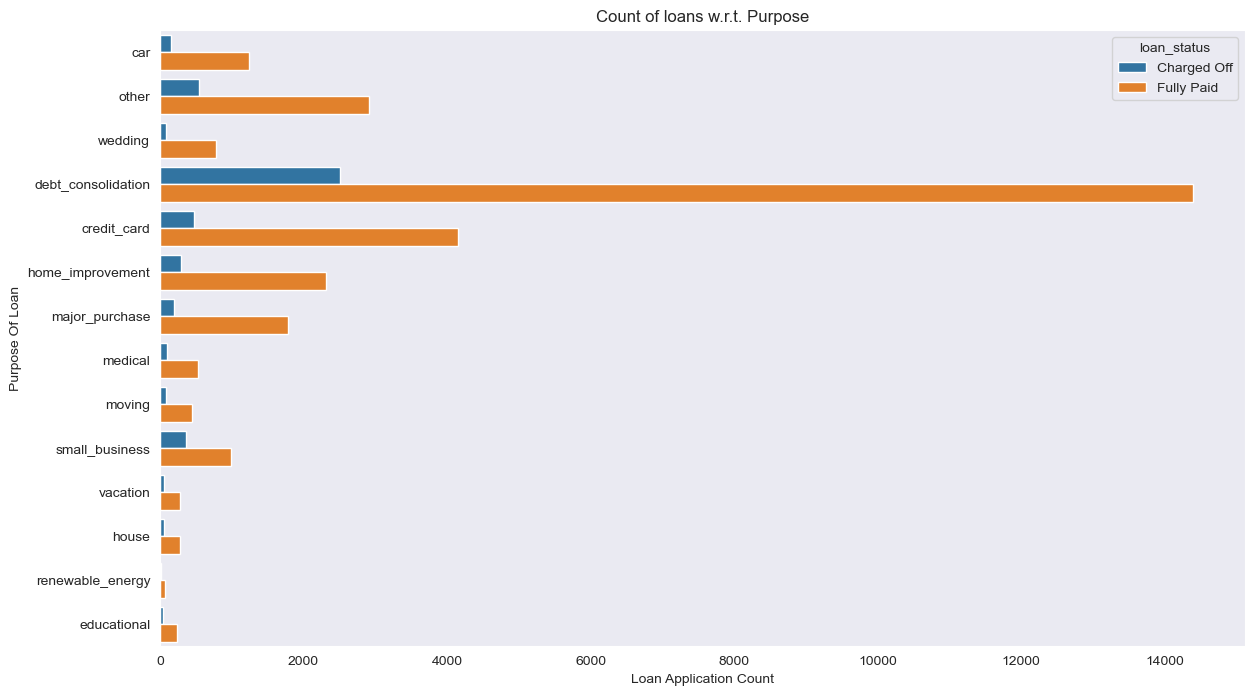

In [69]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_final,hue='loan_status')
ax.set_title('Count of loans w.r.t. Purpose')
ax.set_ylabel('Purpose Of Loan')
ax.set_xlabel('Loan Application Count')      
plt.show()

Above plot shows that most of the loans were taken for the purpose of "debt consolidation" & "paying credit card bill".
Number of chraged off count also high too for these loans.

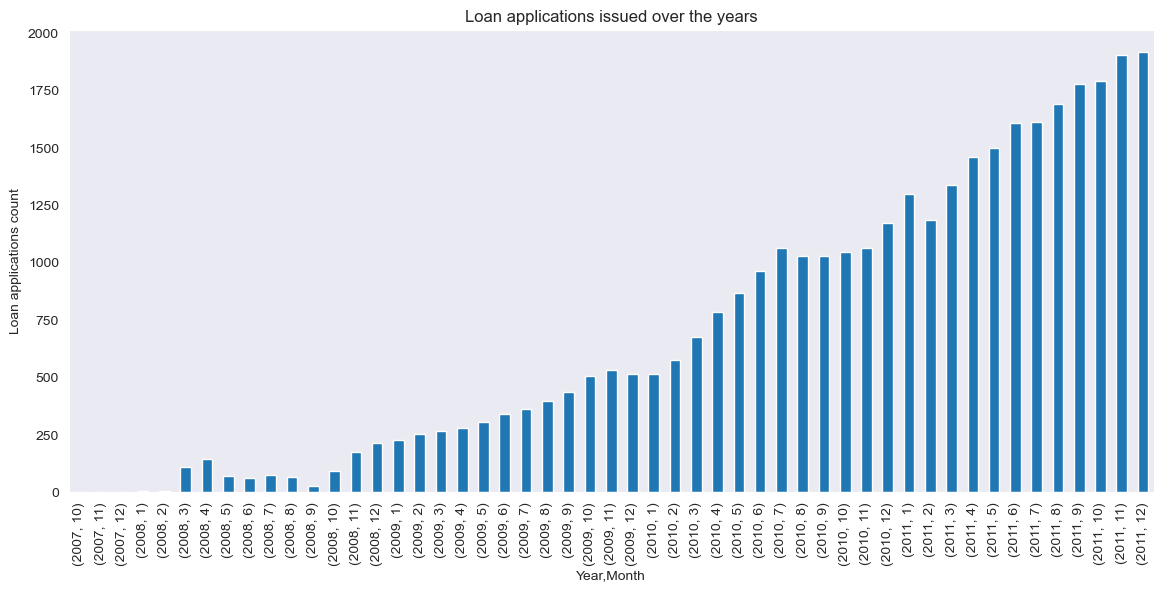

In [72]:
plt.figure(figsize=(14,6))
df_final.groupby(['issue_year','issue_month']).loan_status.count().plot(kind='bar')
plt.title("Loan applications issued over the years")
plt.ylabel('Loan applications count')
plt.xlabel('Year,Month')      
plt.show()

Count of loan application is increasing every year and these increasing number of loan applications are adding more to number of charged off applications.

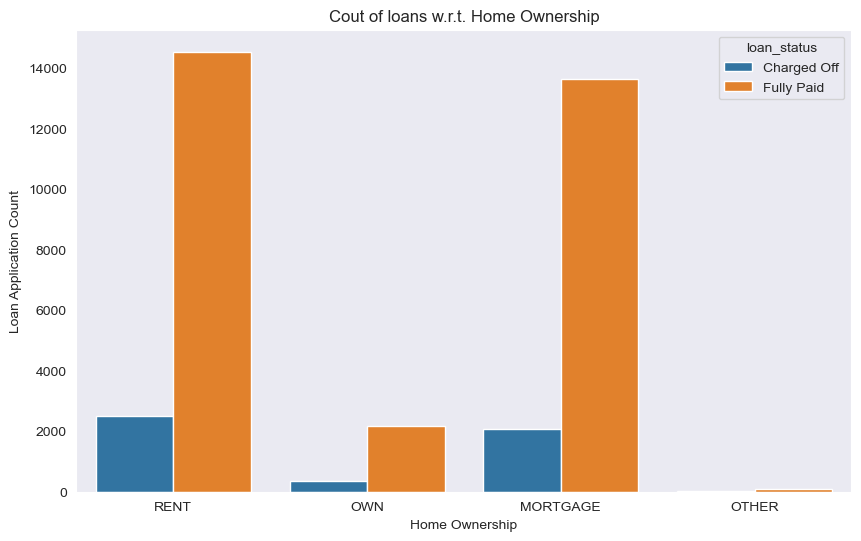

In [73]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=df_final,hue='loan_status')
ax.set_title('Cout of loans w.r.t. Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')      
plt.show()

As per above chart, people who are living in Rented homes or have mortgaged their home are taking more loans and thereby also have higher proportion of chargeoff.

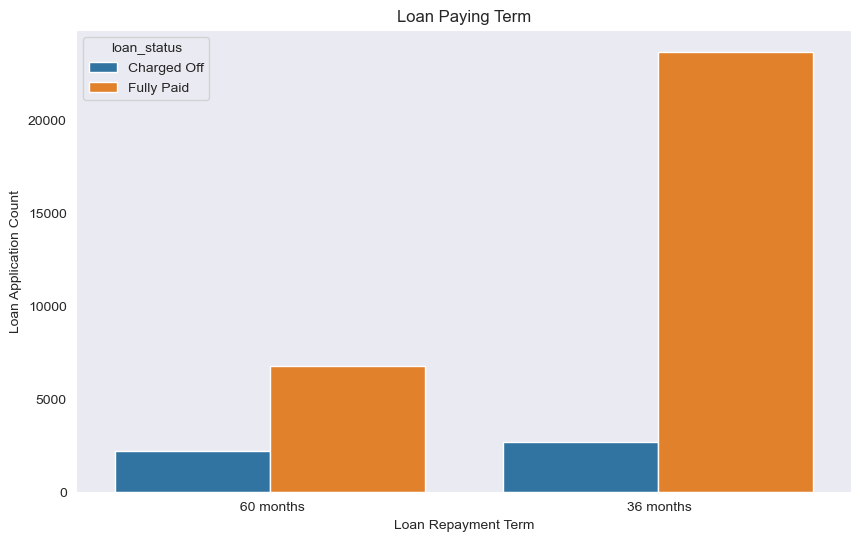

In [74]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=df_final,hue='loan_status')
ax.set_title('Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')      
plt.show()


There is no significant difference between the tenure of the loan and the chargeoff. 

<Figure size 1400x800 with 0 Axes>

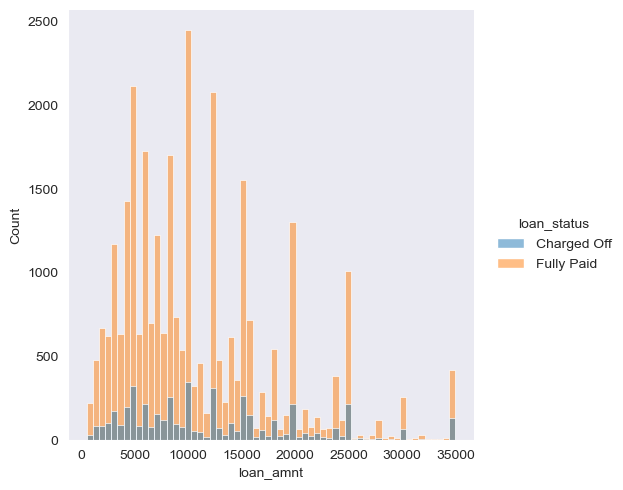

In [79]:
plt.figure(figsize=(14,8))
sns.displot(x="loan_amnt",data=df_final,hue='loan_status')
plt.show()

<Figure size 1400x800 with 0 Axes>

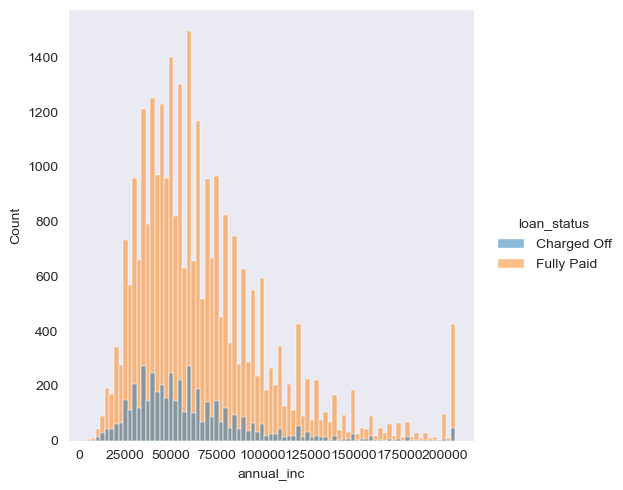

In [80]:
plt.figure(figsize=(14,8))
sns.displot(x="annual_inc",data=df_final,hue='loan_status')
plt.show()

There is no significant insight can be derived from above 2 plots.
We can convert these fields to categorical bins.

In [82]:
df_final.loan_amnt.describe()

count    35365.000000
mean     11133.179697
std       7326.276639
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [88]:
df_final['loan_amnt_bins']=pd.qcut(df_final['loan_amnt'], q=4, labels=['0-5500','5500-10000','10000-15000','15000+'])

In [89]:
df_final.annual_inc.describe()

count     35365.000000
mean      67067.957971
std       36806.493047
min        4000.000000
25%       41500.000000
50%       60000.000000
75%       82500.000000
max      205500.000000
Name: annual_inc, dtype: float64

In [90]:
df_final['annual_inc_bins']=pd.qcut(df_final['annual_inc'], q=4, labels=['0-41500','41500-60000','60000-82500','82500+'])

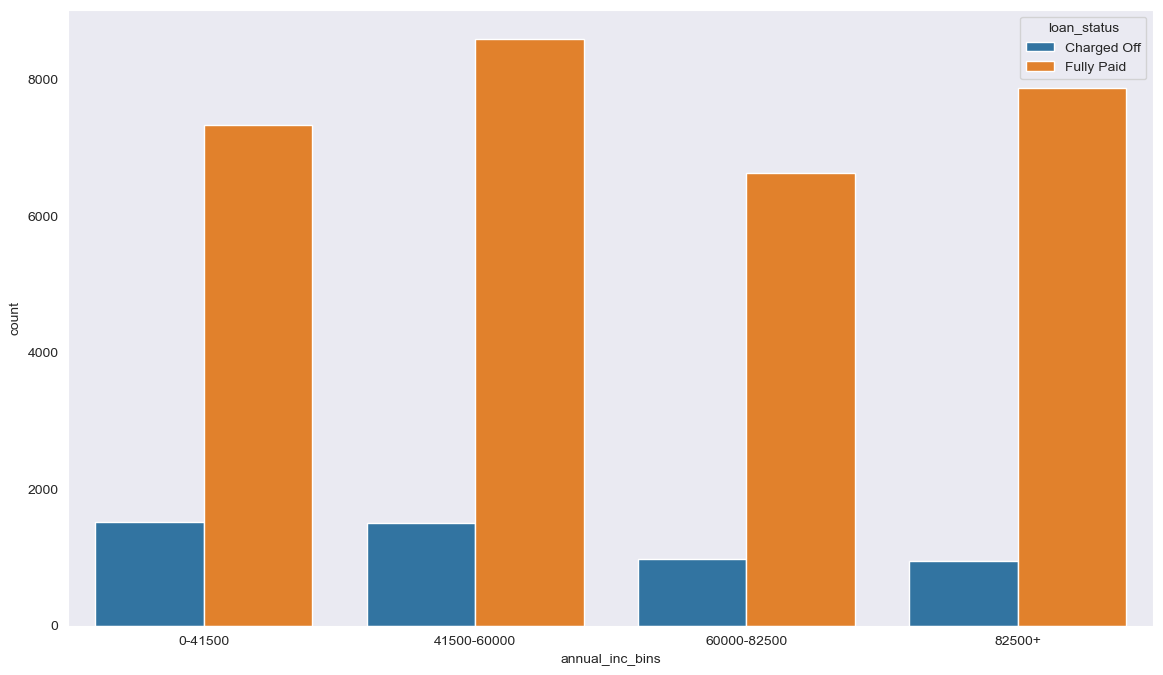

In [91]:
plt.figure(figsize=(14,8))
sns.countplot(x="annual_inc_bins",data=df_final,hue='loan_status')
plt.show()

<Figure size 1400x800 with 0 Axes>

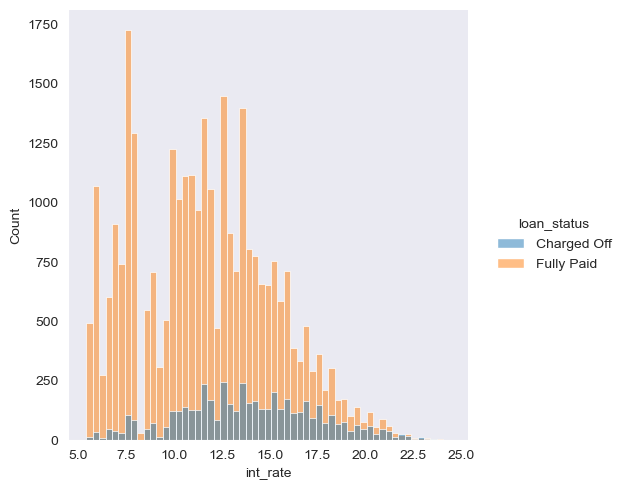

In [92]:
plt.figure(figsize=(14,8))
sns.displot(x="int_rate",data=df_final,hue='loan_status')
plt.show()

<Figure size 1400x800 with 0 Axes>

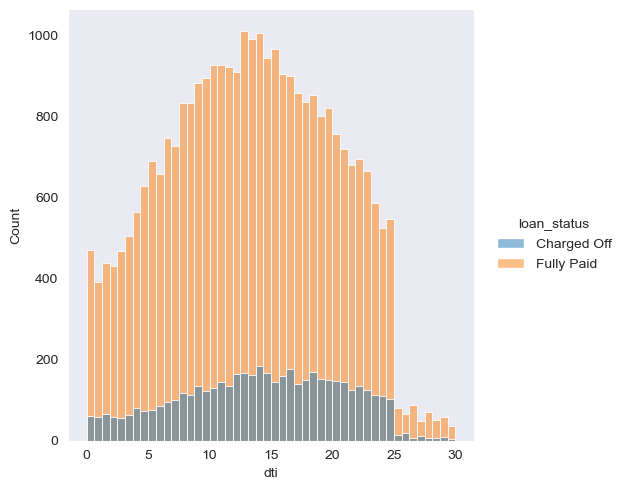

In [93]:
plt.figure(figsize=(14,8))
sns.displot(x="dti",data=df_final,hue='loan_status')
plt.show()

There is no significant insight can be derived from above 2 plots related to intertest rates and debt to interest ration.
We can convert these fields to categorical bins.

In [94]:
df_final.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [95]:
df_final['int_rate_bins']=pd.qcut(df_final['int_rate'], q=4, labels=['0-9','9-12','12-15','15+'])

In [96]:
df_final.dti.describe()

count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [97]:
df_final['dti_bins']=pd.qcut(df_final['dti'], q=4, labels=['0-8','8-13','13-19','19+'])

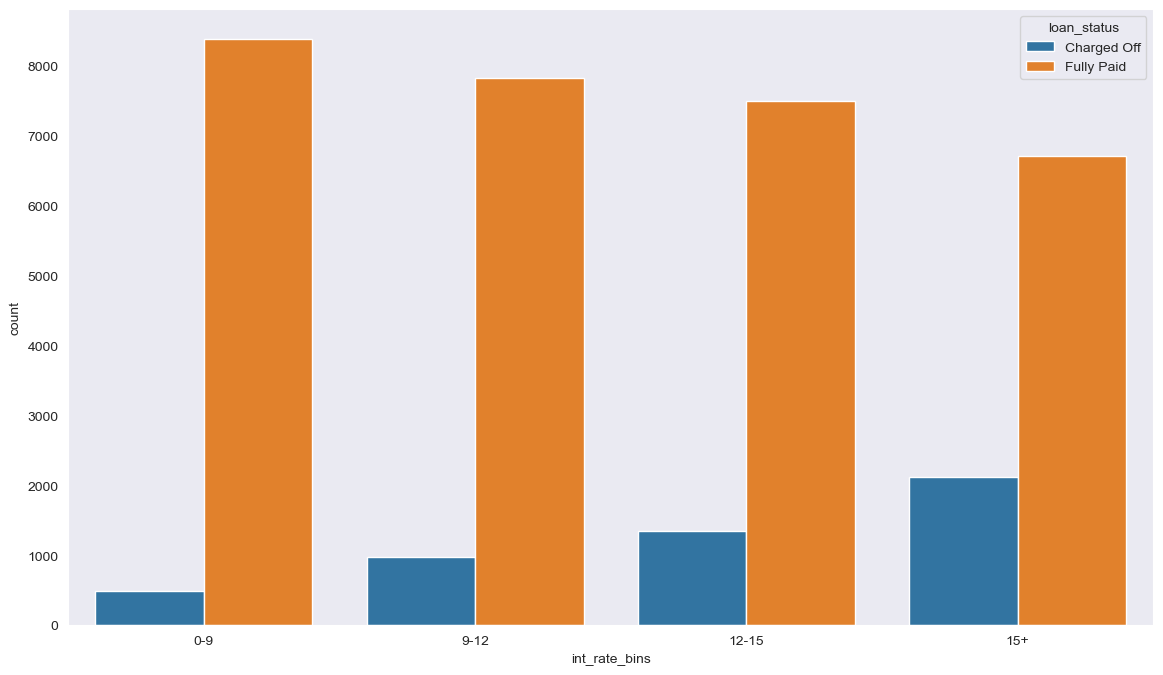

In [98]:
plt.figure(figsize=(14,8))
sns.countplot(x="int_rate_bins",data=df_final,hue='loan_status')
plt.show()

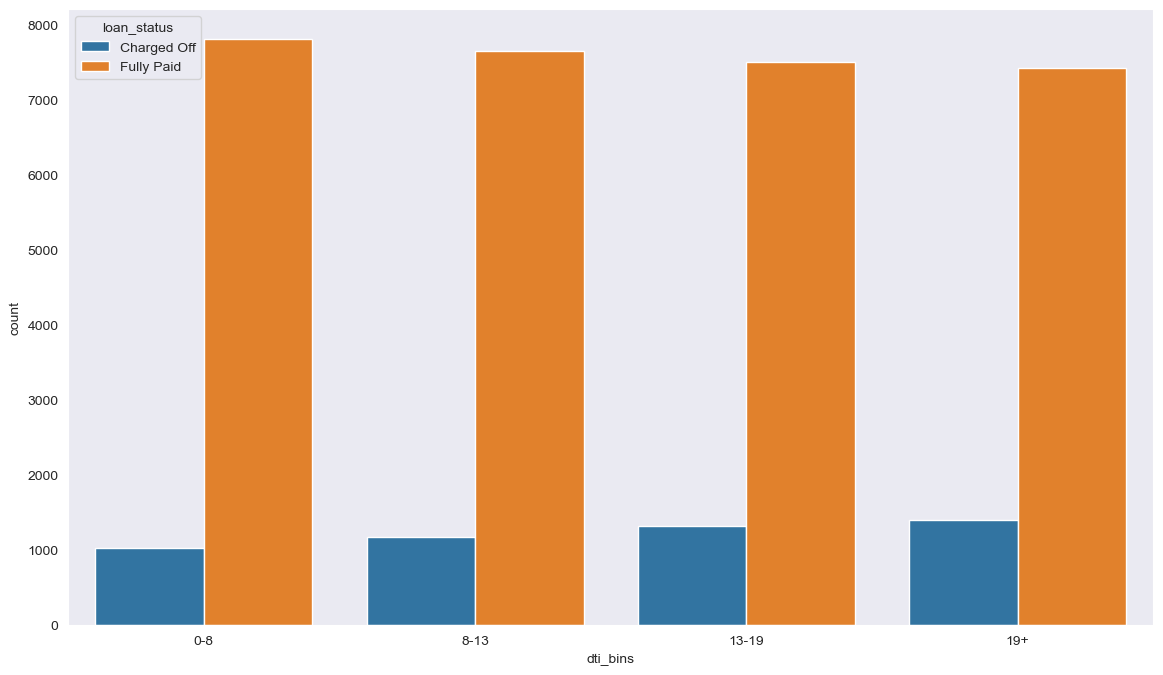

In [99]:
plt.figure(figsize=(14,8))
sns.countplot(x="dti_bins",data=df_final,hue='loan_status')
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

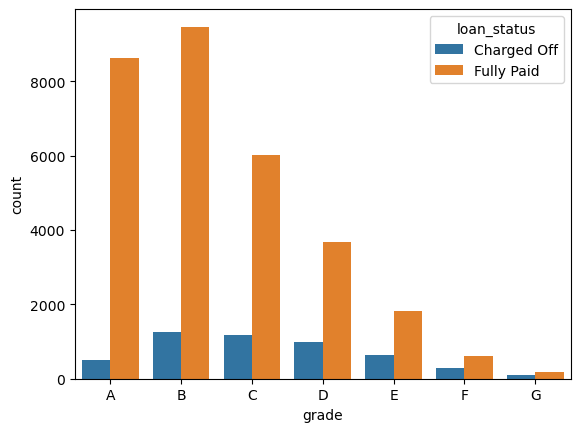

In [62]:
sns.countplot(data=df_final, x='grade', hue='loan_status', order=['A','B','C','D','E','F','G'])

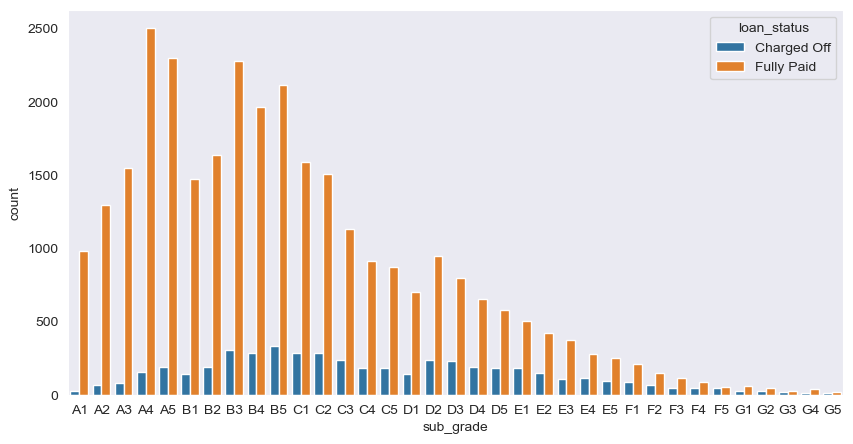

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_final, x='sub_grade', hue='loan_status', order = df_final.sub_grade.value_counts().sort_index().index)
plt.show()

# Business Case - Identifying factors contributing to charge-off
For this, I will create a pivote table for each feature and analyse the same.

In [114]:
# Annual income vs Chargedoff_Proportion

annual_inc_loan = df_final.pivot_table(index='annual_inc_bins', columns='loan_status', values='annual_inc',aggfunc=(lambda x: len(x))).reset_index()


annual_inc_loan['Total'] = annual_inc_loan['Charged Off'] + annual_inc_loan['Fully Paid'] 
annual_inc_loan['Chargedoff_Proportion'] = annual_inc_loan['Charged Off'] / annual_inc_loan['Total']
annual_inc_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bins,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-41500,1516,7333,8849,0.171319
1,41500-60000,1504,8586,10090,0.149058
2,60000-82500,970,6628,7598,0.127665
3,82500+,952,7876,8828,0.107839


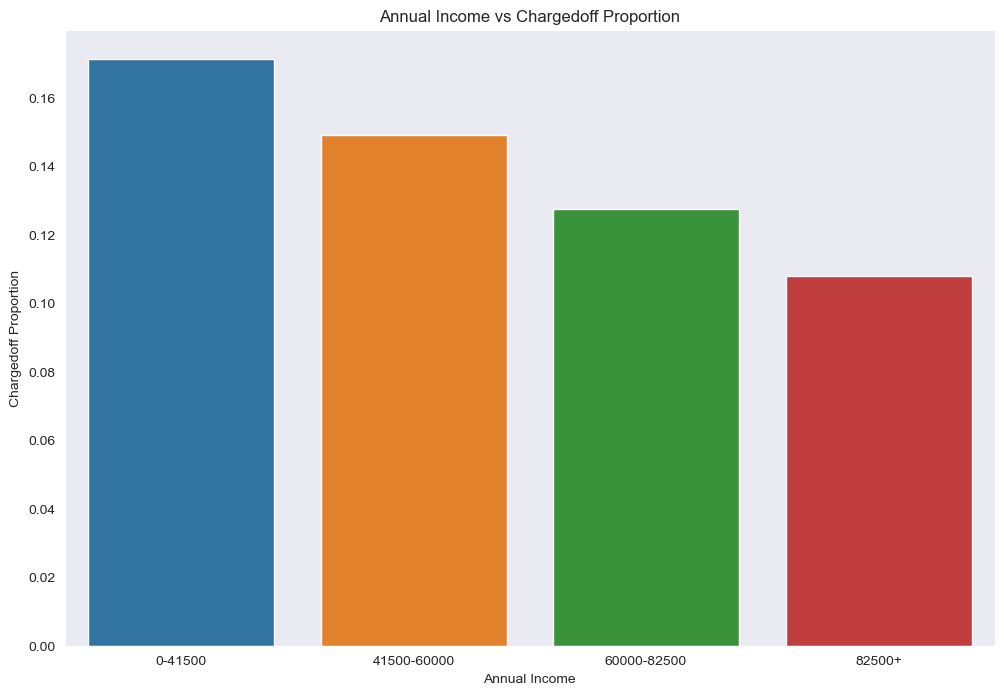

In [116]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion')
ax1=sns.barplot(x='annual_inc_bins', y='Chargedoff_Proportion', data=annual_inc_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Annual Income')
plt.show()

- As the annual income increases the charged off proportion decreases.
- Income range 82500+  has less chances of charged off.
- Income range 0-41500 has high chances of charged off.

In [117]:
# Loan amount vs Chargedoff_Proportion

loan_amt_loan = df_final.pivot_table(index='loan_amnt_bins', columns='loan_status', values='loan_amnt',aggfunc=(lambda x: len(x))).reset_index()


loan_amt_loan['Total'] = loan_amt_loan['Charged Off'] + loan_amt_loan['Fully Paid'] 
loan_amt_loan['Chargedoff_Proportion'] = loan_amt_loan['Charged Off'] / loan_amt_loan['Total']
loan_amt_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,loan_amnt_bins,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,15000+,1458,6528,7986,0.182569
2,10000-15000,946,6254,7200,0.131389
0,0-5500,1157,7781,8938,0.129447
1,5500-10000,1381,9860,11241,0.122854


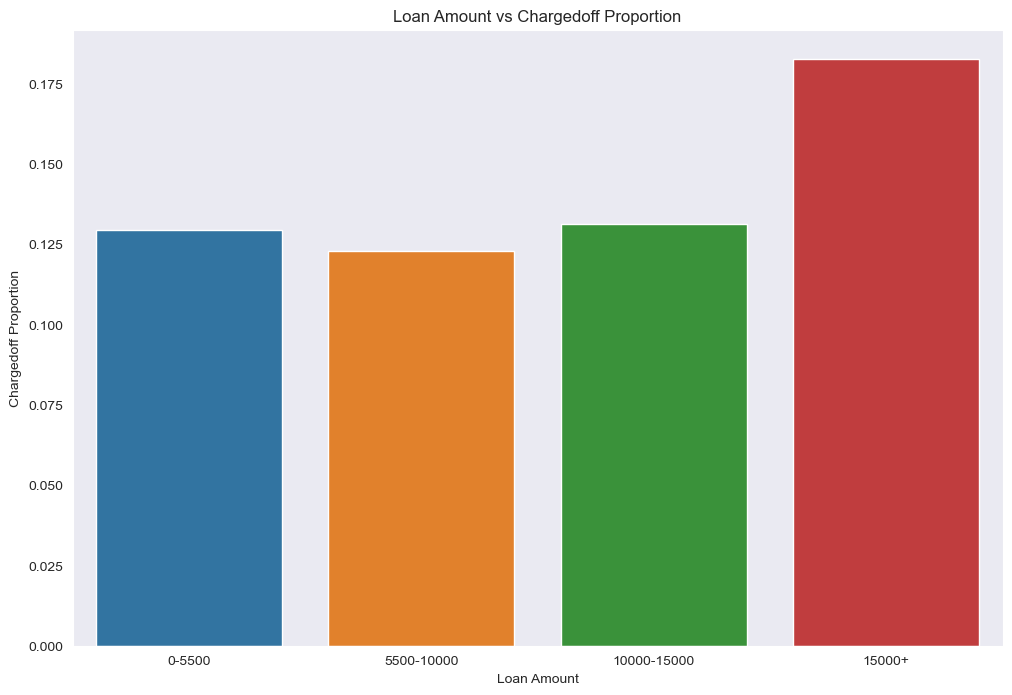

In [119]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Loan Amount vs Chargedoff Proportion')
ax1=sns.barplot(x='loan_amnt_bins', y='Chargedoff_Proportion', data=loan_amt_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Loan Amount')
plt.show()

- For higher loan amoount i.e. 15000+ there are high chances of charge off.

In [120]:
# Purpose vs Chargedoff_Proportion

purpose_loan = df_final.pivot_table(index='purpose', columns='loan_status', values='loan_amnt',aggfunc=(lambda x: len(x))).reset_index()


purpose_loan['Total'] = purpose_loan['Charged Off'] + purpose_loan['Fully Paid'] 
purpose_loan['Chargedoff_Proportion'] = purpose_loan['Charged Off'] / purpose_loan['Total']
purpose_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,356,995,1351,0.263509
10,renewable_energy,15,72,87,0.172414
3,educational,45,231,276,0.163043
9,other,546,2916,3462,0.157712
5,house,52,278,330,0.157576
7,medical,95,527,622,0.152733
8,moving,79,444,523,0.151052
2,debt_consolidation,2508,14401,16909,0.148323
12,vacation,49,283,332,0.147590
4,home_improvement,296,2318,2614,0.113236


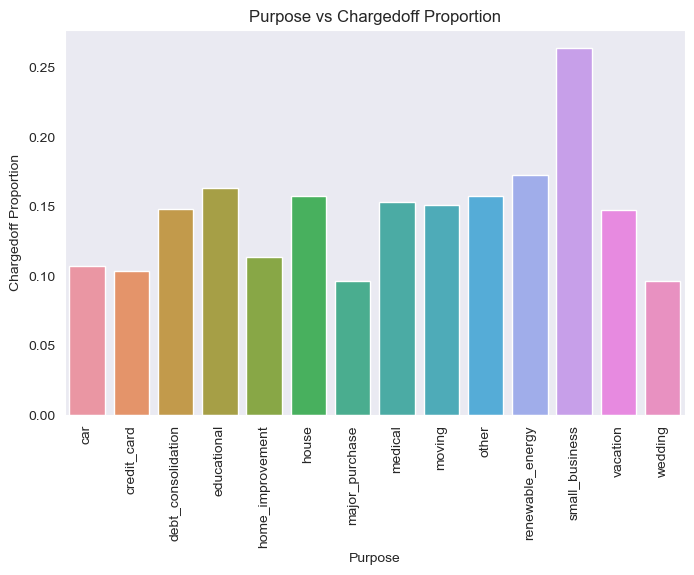

In [126]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Purpose vs Chargedoff Proportion')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Purpose')
plt.xticks(rotation=90)
plt.show()

- small Business loans have high chances of getting charged off.

In [127]:
# Grade vs Chargedoff_Proportion

grade_loan = df_final.pivot_table(index='grade', columns='loan_status', values='sub_grade',aggfunc=(lambda x: len(x))).reset_index()


grade_loan['Total'] = grade_loan['Charged Off'] + grade_loan['Fully Paid'] 
grade_loan['Chargedoff_Proportion'] = grade_loan['Charged Off'] / grade_loan['Total']
grade_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,93,189,282,0.329787
5,F,286,616,902,0.317073
4,E,648,1833,2481,0.261185
3,D,980,3682,4662,0.210210
2,C,1169,6011,7180,0.162813
1,B,1253,9465,10718,0.116906
0,A,513,8627,9140,0.056127


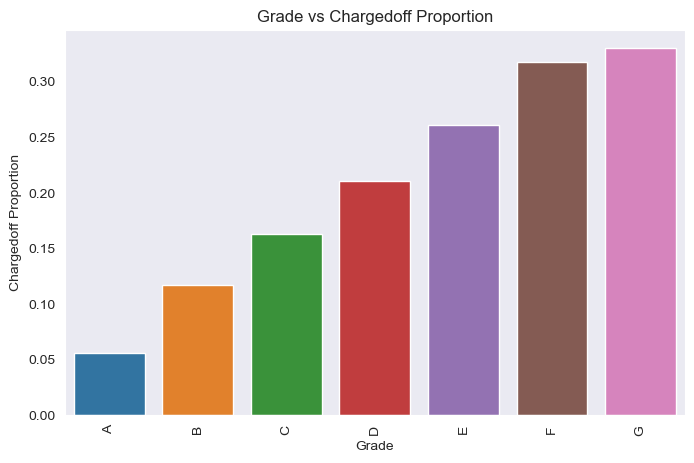

In [128]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Grade vs Chargedoff Proportion')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Grade')
plt.xticks(rotation=90)
plt.show()

- Chances of charged off increases from "A" towards "G"
- Grade "A" has very less chances of charged off.
- Grade "F" and "G" have very high chances of charged off.

In [129]:
# sub grade vs Chargedoff_Proportion

sub_grade_loan = df_final.pivot_table(index='sub_grade', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


sub_grade_loan['Total'] = sub_grade_loan['Charged Off'] + sub_grade_loan['Fully Paid'] 
sub_grade_loan['Chargedoff_Proportion'] = sub_grade_loan['Charged Off'] / sub_grade_loan['Total']
sub_grade_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,46,53,99,0.464646
32,G3,18,23,41,0.439024
31,G2,27,47,74,0.364865
34,G5,9,16,25,0.360000
28,F4,48,88,136,0.352941
30,G1,26,62,88,0.295455
26,F2,63,151,214,0.294393
23,E4,115,279,394,0.291878
25,F1,84,209,293,0.286689
27,F3,45,115,160,0.281250


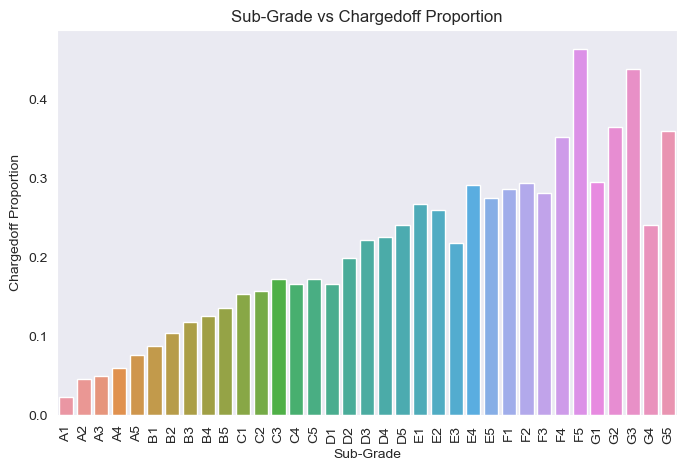

In [130]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Sub-Grade vs Chargedoff Proportion')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Sub-Grade')
plt.xticks(rotation=90)
plt.show()

- Chances of charged off increases from sub grades "A" towards sub grades of "G"
- sub Grades of "A" has very less chances of charged off.
- sub Grades of "F" and "G" have very high chances of charged off.

In [132]:
# Interest rate vs Chargedoff_Proportion

int_rate_loan = df_final.pivot_table(index='int_rate_bins', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


int_rate_loan['Total'] = int_rate_loan['Charged Off'] + int_rate_loan['Fully Paid'] 
int_rate_loan['Chargedoff_Proportion'] = int_rate_loan['Charged Off'] / int_rate_loan['Total']
int_rate_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bins,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,15+,2125,6709,8834,0.240548
2,12-15,1348,7495,8843,0.152437
1,9-12,975,7826,8801,0.110783
0,0-9,494,8393,8887,0.055587


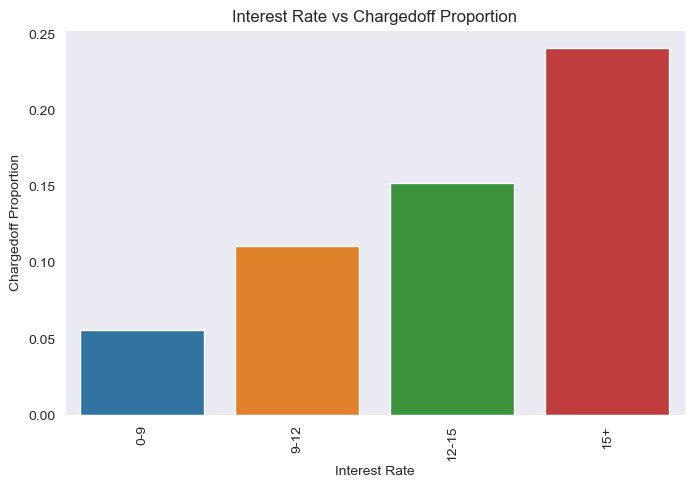

In [133]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Interest Rate vs Chargedoff Proportion')
ax1=sns.barplot(x='int_rate_bins', y='Chargedoff_Proportion', data=int_rate_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

- Charge off increases with increase in interest rate. Higher interest rate loans are more likely to charging off.
- interest rate less than 9% has very less chances of charged off.
- interest rate more than 15% has more chances of charged off.

In [134]:
# Debt to income vs Chargedoff_Proportion

dti_loan = df_final.pivot_table(index='dti_bins', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


dti_loan['Total'] = dti_loan['Charged Off'] + dti_loan['Fully Paid'] 
dti_loan['Chargedoff_Proportion'] = dti_loan['Charged Off'] / dti_loan['Total']
dti_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_bins,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,19+,1408,7433,8841,0.159258
2,13-19,1329,7511,8840,0.150339
1,8-13,1175,7657,8832,0.133039
0,0-8,1030,7822,8852,0.116358


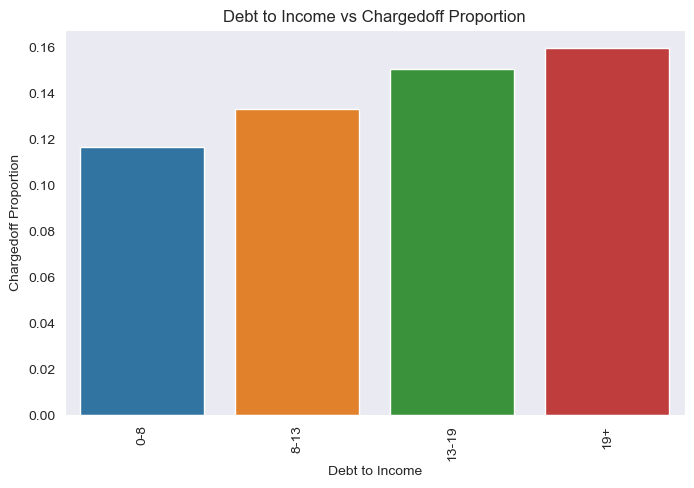

In [136]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Debt to Income vs Chargedoff Proportion')
ax1=sns.barplot(x='dti_bins', y='Chargedoff_Proportion', data=dti_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Debt to Income')
plt.xticks(rotation=90)
plt.show()

- Charge off increases with increase in debt to income ratio. Higher dti customers are more likely to charging off.
- debt to interest ratio less than 8% has very less chances of charged off.
- debt to interest ratio more than 19% has more chances of charged off.

In [137]:
# Employee length vs Chargedoff_Proportion

emp_length_loan = df_final.pivot_table(index='emp_length', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


emp_length_loan['Total'] = emp_length_loan['Charged Off'] + emp_length_loan['Fully Paid'] 
emp_length_loan['Chargedoff_Proportion'] = emp_length_loan['Charged Off'] / emp_length_loan['Total']
emp_length_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,10,1233,6795,8028,0.153587
7,7,248,1390,1638,0.151404
8,8,191,1170,1361,0.140338
6,6,287,1775,2062,0.139185
5,5,422,2621,3043,0.138679
1,1,408,2551,2959,0.137884
3,3,521,3312,3833,0.135925
0,0,530,3448,3978,0.133233
4,4,427,2779,3206,0.133188
2,2,528,3553,4081,0.129380


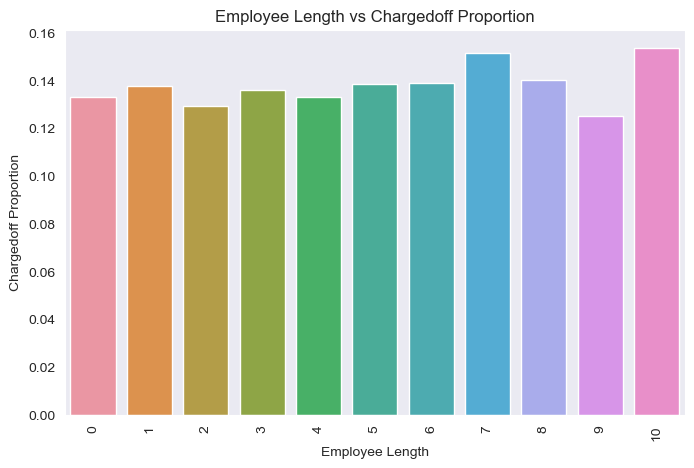

In [140]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Employee Length vs Chargedoff Proportion')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Employee Length')
plt.xticks(rotation=90)
plt.show()

- No significance on lenght of employment

In [142]:
# State vs Chargedoff_Proportion

state_loan = df_final.pivot_table(index='addr_state', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


state_loan['Total'] = state_loan['Charged Off'] + state_loan['Fully Paid'] 
state_loan['Chargedoff_Proportion'] = state_loan['Charged Off'] / state_loan['Total']
state_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
30,NV,97.0,345.0,442.0,0.219457
0,AK,15.0,58.0,73.0,0.205479
39,TN,2.0,8.0,10.0,0.200000
38,SD,10.0,45.0,55.0,0.181818
9,FL,437.0,2098.0,2535.0,0.172387
29,NM,28.0,135.0,163.0,0.171779
11,HI,26.0,127.0,153.0,0.169935
34,OR,63.0,334.0,397.0,0.158690
22,MO,95.0,514.0,609.0,0.155993
10,GA,194.0,1059.0,1253.0,0.154828


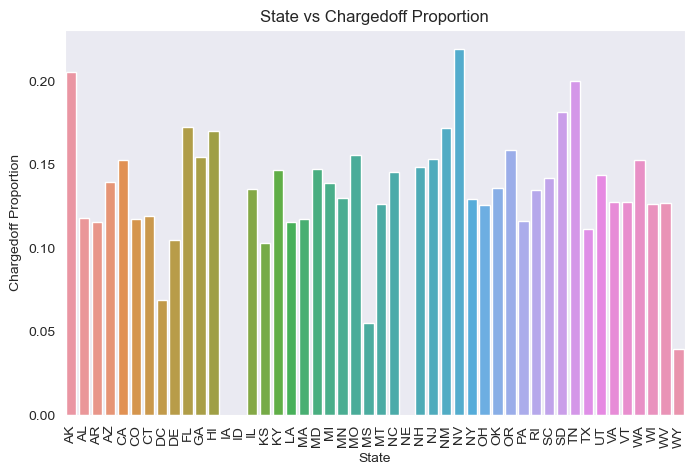

In [143]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('State vs Chargedoff Proportion')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('State')
plt.xticks(rotation=90)
plt.show()

- States NV, AK and TN has very high chances of charged off.

In [146]:
# Verification Status Chargedoff_Proportion

verification_status_loan = df_final.pivot_table(index='verification_status', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


verification_status_loan['Total'] = verification_status_loan['Charged Off'] + verification_status_loan['Fully Paid'] 
verification_status_loan['Chargedoff_Proportion'] = verification_status_loan['Charged Off'] / verification_status_loan['Total']
verification_status_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1851,9512,11363,0.162897
1,Source Verified,1322,7842,9164,0.144260
0,Not Verified,1769,13069,14838,0.119221


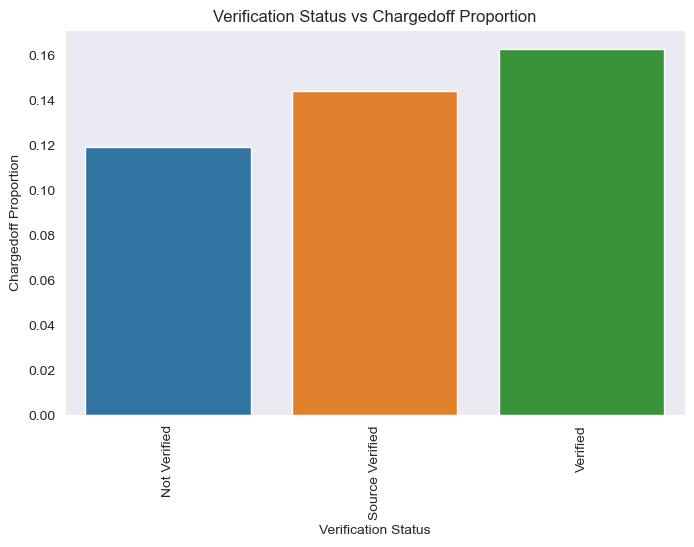

In [147]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Verification Status vs Chargedoff Proportion')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Verification Status')
plt.xticks(rotation=90)
plt.show()

In [148]:
# Issue month vs Chargedoff_Proportion

issue_month_loan = df_final.pivot_table(index='issue_month', columns='loan_status', values='grade',aggfunc=(lambda x: len(x))).reset_index()


issue_month_loan['Total'] = issue_month_loan['Charged Off'] + issue_month_loan['Fully Paid'] 
issue_month_loan['Chargedoff_Proportion'] = issue_month_loan['Charged Off'] / issue_month_loan['Total']
issue_month_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,12,599,3221,3820,0.156806
4,5,423,2322,2745,0.154098
8,9,496,2780,3276,0.151404
9,10,511,2925,3436,0.148719
5,6,429,2548,2977,0.144105
10,11,517,3161,3678,0.140566
6,7,433,2682,3115,0.139005
7,8,427,2759,3186,0.134024
3,4,341,2328,2669,0.127763
0,1,257,1791,2048,0.125488


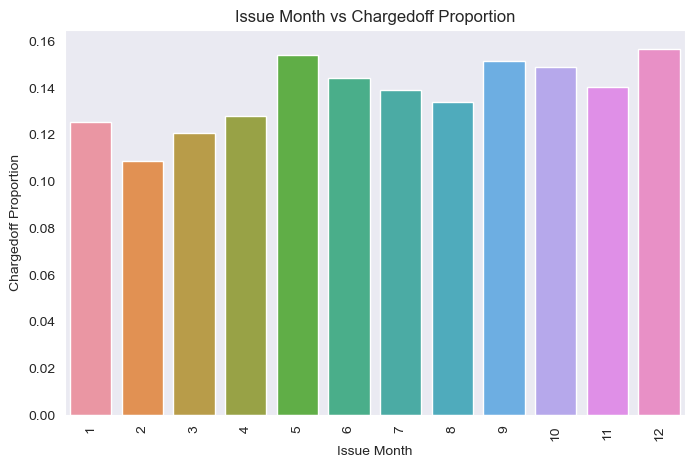

In [149]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_title('Issue Month vs Chargedoff Proportion')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Issue Month')
plt.xticks(rotation=90)
plt.show()

# Conclusion

1. As the annual income increases the charged off proportion decreases. Lower income group applicants are more likely to be defaulters.
2. For higher loan amoount i.e. 15000+ there are high chances of charge off.
3. Loans taken for small businesses are more likely to get charged off than the ones taken for any other purpose.
4. Loans taken for weddings are haveing lowest charge off rate.
5. Chances of charged off increases from "A" towards "G"
6. Chances of charged off increases from sub grades "A" towards sub grades of "G"
7. Charge off increases with increase in interest rate. Higher interest rate loans are more likely to charging off.
8. Charge off increases with increase in debt to income ratio. Higher dti customers are more likely to charging off.


---- END ----